<a href="https://colab.research.google.com/github/R452h/supertail-assignment/blob/main/supertail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
customers = pd.read_csv("/content/cx_data.csv")
orders = pd.read_csv("/content/orders_data.csv")
events = pd.read_csv("/content/Engagemnet metrics.csv")


In [21]:
customers.columns = customers.columns.str.strip().str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.strip().str.lower().str.replace(' ', '_')
events.columns = events.columns.str.strip().str.lower().str.replace(' ', '_')


In [22]:
events.rename(columns={'user_id': 'customer_id'}, inplace=True)


In [23]:
customers['registered_date'] = pd.to_datetime(
    customers['registered_date'], errors='coerce'
)

orders['order_date'] = pd.to_datetime(
    orders['order_date'], errors='coerce'
)

events['event_date'] = pd.to_datetime(
    events['event_date'], format='%Y%m%d', errors='coerce'
)


In [24]:
customers = customers.drop_duplicates()
orders = orders.drop_duplicates()
events = events.drop_duplicates()


In [25]:
valid_statuses = ['valid', 'completed', 'success', 'delivered']

orders = orders[
    orders['order_status']
    .astype(str)
    .str.lower()
    .isin(valid_statuses)
]


In [26]:
customers['customer_id'] = customers['customer_id'].astype(str)
orders['customer_id'] = orders['customer_id'].astype(str)
events['customer_id'] = events['customer_id'].astype(str)


In [27]:
active_users = events['customer_id'].nunique()
ordering_users = orders['customer_id'].nunique()

conversion_rate = (
    ordering_users / active_users
    if active_users > 0 else 0
)

print("Active Users:", active_users)
print("Ordering Users:", ordering_users)
print("Conversion Rate:", round(conversion_rate * 100, 2), "%")


Active Users: 147336
Ordering Users: 32964
Conversion Rate: 22.37 %


In [28]:
daily_active = (
    events.groupby('event_date')['customer_id']
    .nunique()
)

daily_orders = (
    orders.groupby('order_date')['customer_id']
    .nunique()
)


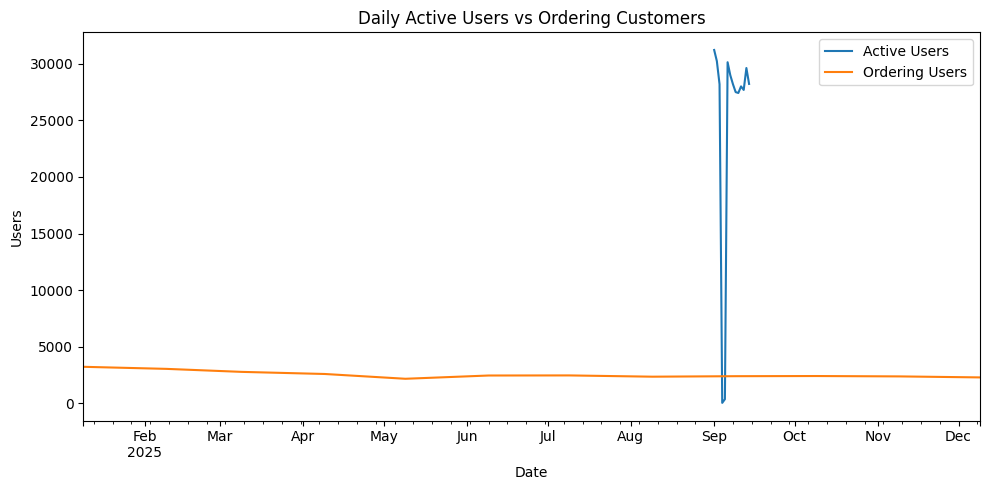

In [29]:
plt.figure(figsize=(10, 5))

daily_active.plot(label='Active Users')

if not daily_orders.empty:
    daily_orders.plot(label='Ordering Users')
else:
    print("No valid orders available for daily trend")

plt.xlabel("Date")
plt.ylabel("Users")
plt.title("Daily Active Users vs Ordering Customers")
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
orders_customers = orders.merge(
    customers,
    on='customer_id',
    how='left'
)


In [32]:
channel_cols = [c for c in orders_customers.columns if 'acq' in c]

channel_col = channel_cols[0]
print("Using acquisition column:", channel_col)


Using acquisition column: acquistion_channel


In [33]:
revenue_by_channel = (
    orders_customers
    .dropna(subset=[channel_col])
    .groupby(channel_col)['net_sales']
    .sum()
    .sort_values(ascending=False)
)

print(revenue_by_channel)


acquistion_channel
Channel 4     13957447.74
Channel 7     13456665.70
Channel 1     12784451.58
Channel 2     10842598.37
Channel 15     7043233.42
Channel 8      4941965.93
Channel 10     3440331.21
Channel 3      2513906.40
Channel 11     2283042.85
Channel 5      1627059.93
Channel 18     1326042.95
Channel 14     1080183.51
Channel 12     1003815.19
Channel 9       852386.70
Channel 17      820756.69
Channel 13      430719.93
Channel 16      162284.37
Channel 6        52006.99
Name: net_sales, dtype: float64


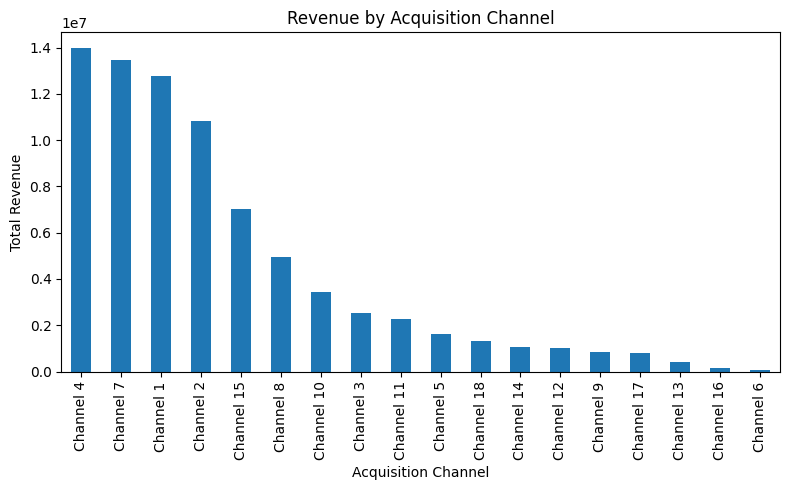

In [34]:
plt.figure(figsize=(8, 5))
revenue_by_channel.plot(kind='bar')
plt.xlabel("Acquisition Channel")
plt.ylabel("Total Revenue")
plt.title("Revenue by Acquisition Channel")
plt.tight_layout()
plt.show()
